In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chicago_df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

In [3]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


<AxesSubplot:>

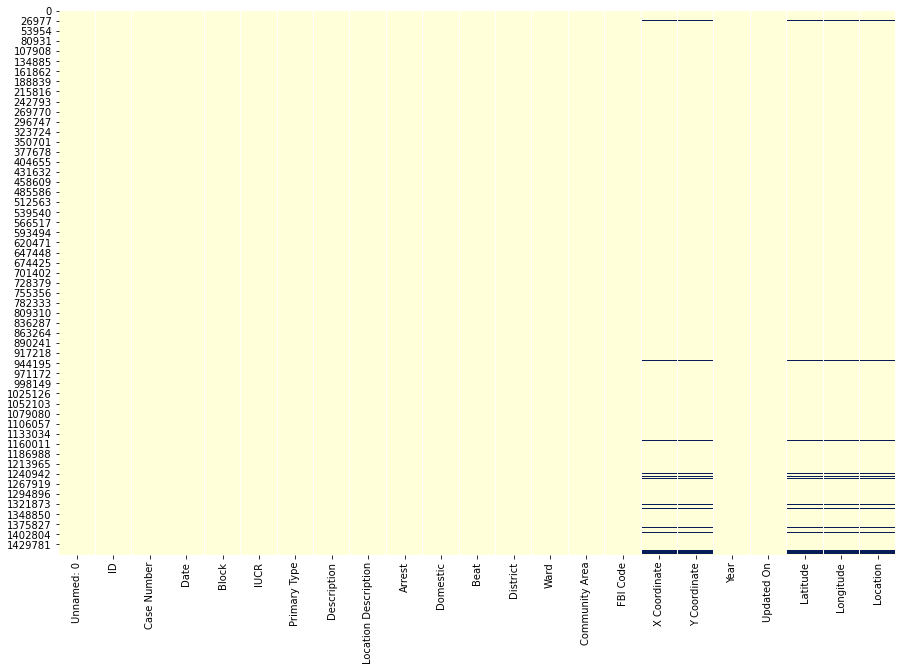

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [5]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [6]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')


In [7]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [8]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         329460
BATTERY                       263700
CRIMINAL DAMAGE               155455
NARCOTICS                     135240
ASSAULT                        91289
OTHER OFFENSE                  87874
BURGLARY                       83397
DECEPTIVE PRACTICE             75495
MOTOR VEHICLE THEFT            61138
ROBBERY                        57313
CRIMINAL TRESPASS              36912
WEAPONS VIOLATION              17233
PUBLIC PEACE VIOLATION         13122
OFFENSE INVOLVING CHILDREN     11398
PROSTITUTION                    7633
Name: Primary Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

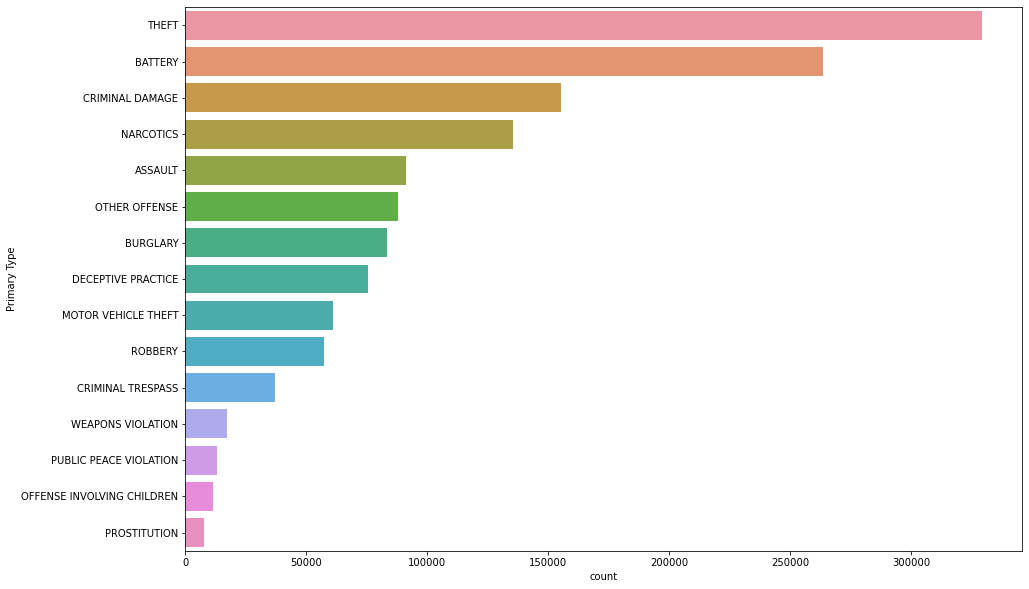

In [9]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='Location Description'>

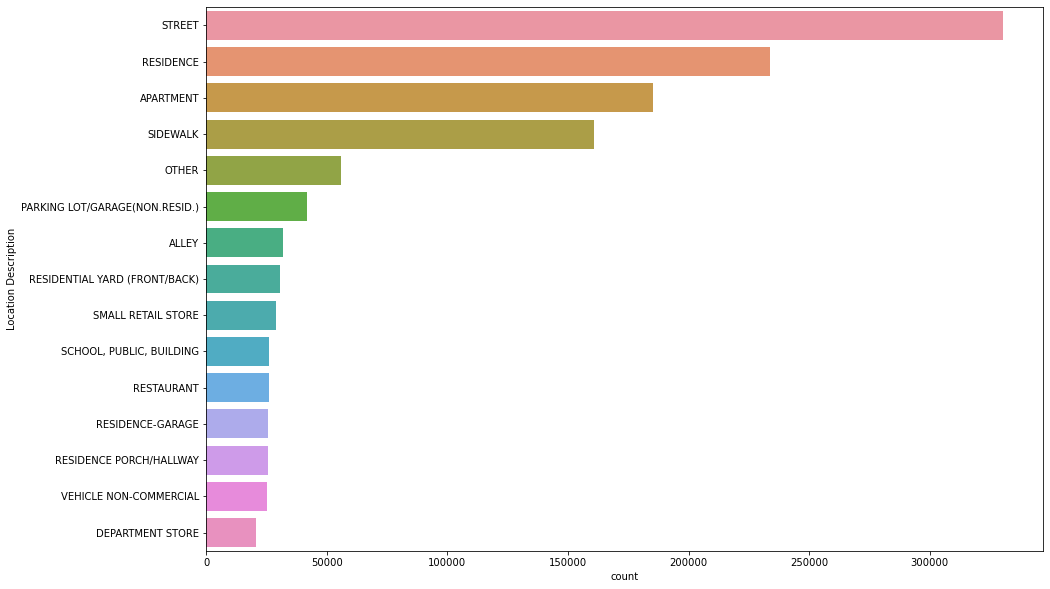

In [10]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [11]:
chicago_df.resample('Y').size()

Date
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

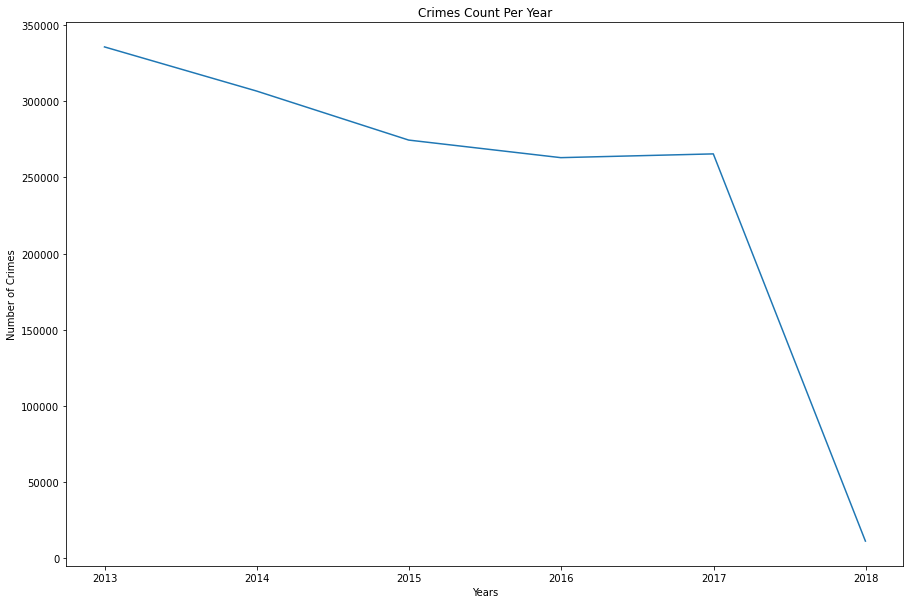

In [12]:
plt.figure(figsize=(15,10))
plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [13]:
chicago_df.resample('M').size()

Date
2012-01-31    26194
2012-02-29    23847
2012-03-31    28533
2012-04-30    27164
2012-05-31    30067
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 61, dtype: int64

Text(0, 0.5, 'Number of Crimes')

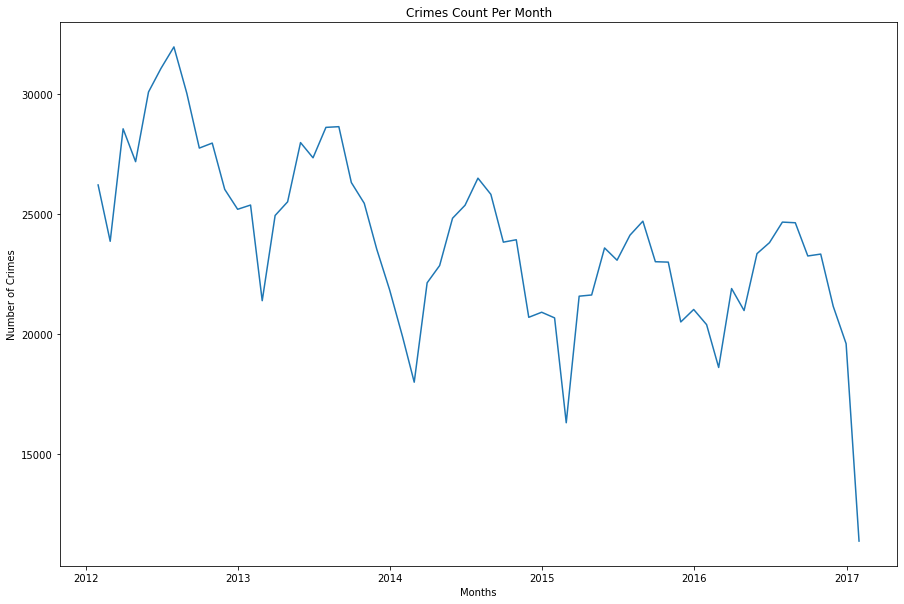

In [14]:
plt.figure(figsize=(15,10))
plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

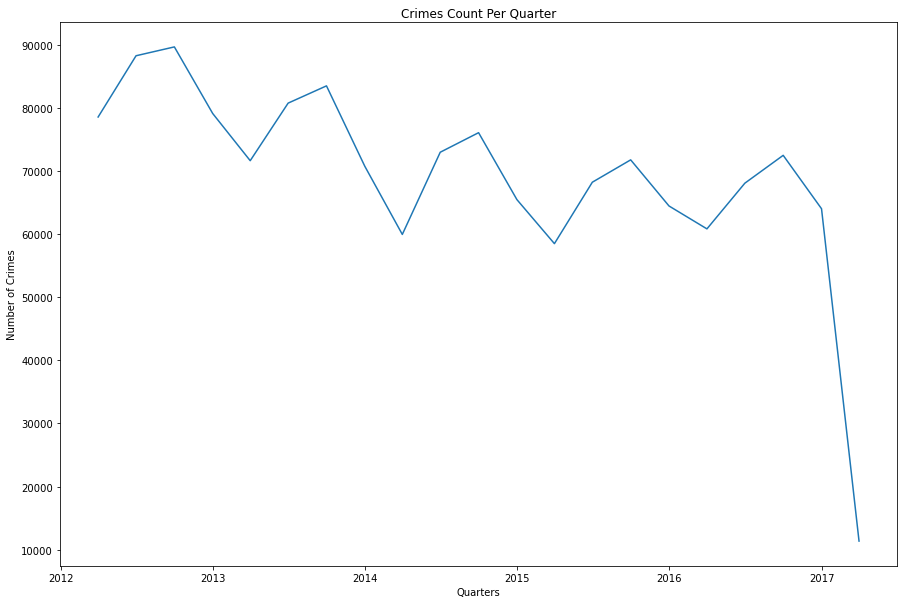

In [15]:
plt.figure(figsize=(15,10))
plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [16]:
 from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [87]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [88]:
chicago_prophet

,Date,0
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [89]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [90]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [91]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [92]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [93]:
chicago_prophet_df_final

,ds,y
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [94]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [96]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29527.994394,25985.301944,28287.198961,29527.994394,29527.994394,-2468.459617,-2468.459617,-2468.459617,-2468.459617,-2468.459617,-2468.459617,0.0,0.0,0.0,27059.534776
1,2012-02-29,29341.449133,23492.223002,25923.175029,29341.449133,29341.449133,-4698.863062,-4698.863062,-4698.863062,-4698.863062,-4698.863062,-4698.863062,0.0,0.0,0.0,24642.586071
2,2012-03-31,29142.038682,26902.016431,29383.583372,29142.038682,29142.038682,-962.793052,-962.793052,-962.793052,-962.793052,-962.793052,-962.793052,0.0,0.0,0.0,28179.245629
3,2012-04-30,28949.060827,25922.808331,28354.295968,28949.060827,28949.060827,-1744.502016,-1744.502016,-1744.502016,-1744.502016,-1744.502016,-1744.502016,0.0,0.0,0.0,27204.558811
4,2012-05-31,28749.650377,28514.939841,30854.111902,28749.650377,28749.650377,923.679223,923.679223,923.679223,923.679223,923.679223,923.679223,0.0,0.0,0.0,29673.329600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2018-01-27,20364.951028,30524.895234,32971.239644,20262.399369,20485.242759,11388.799043,11388.799043,11388.799043,11388.799043,11388.799043,11388.799043,0.0,0.0,0.0,31753.750071
422,2018-01-28,20362.251077,26917.743149,29341.745415,20259.304185,20483.184317,7778.941628,7778.941628,7778.941628,7778.941628,7778.941628,7778.941628,0.0,0.0,0.0,28141.192705
423,2018-01-29,20359.551125,23037.049713,25418.864413,20256.009601,20481.125875,3858.619578,3858.619578,3858.619578,3858.619578,3858.619578,3858.619578,0.0,0.0,0.0,24218.170704
424,2018-01-30,20356.851174,18891.495221,21263.787108,20252.841407,20479.067433,-310.998579,-310.998579,-310.998579,-310.998579,-310.998579,-310.998579,0.0,0.0,0.0,20045.852595


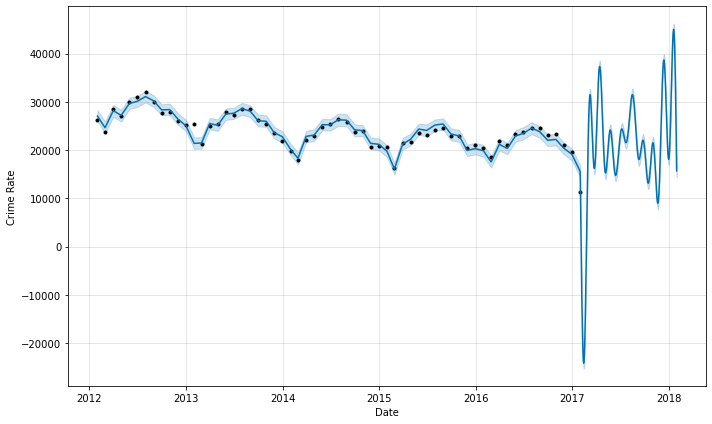

In [97]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

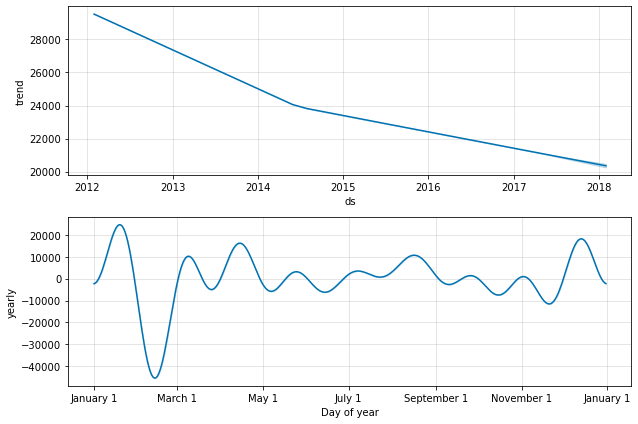

In [98]:
figure1220 = m.plot_components(forecast)

In [29]:
forecast['crime-ratio']=forecast['trend'].apply(lambda x:x/100000)

In [30]:
chicago_df['month']=chicago_df['Date'].apply(lambda x:x.month)

<AxesSubplot:xlabel='month', ylabel='Count'>

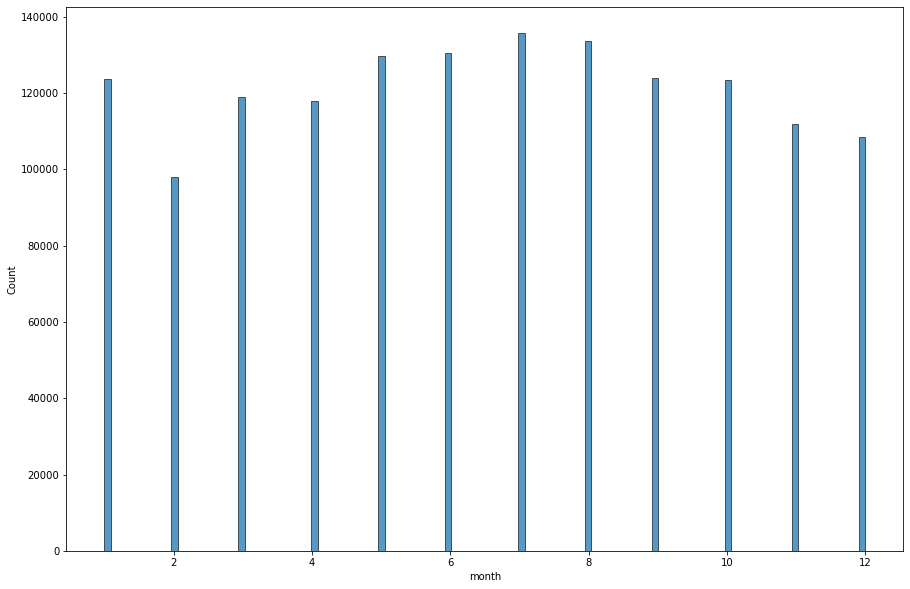

In [31]:
plt.figure(figsize = (15, 10))
sns.histplot(x= 'month', data = chicago_df)

In [99]:
future = m.make_future_dataframe(periods=1095)
forecast = m.predict(future)

<Figure size 3600x720 with 0 Axes>

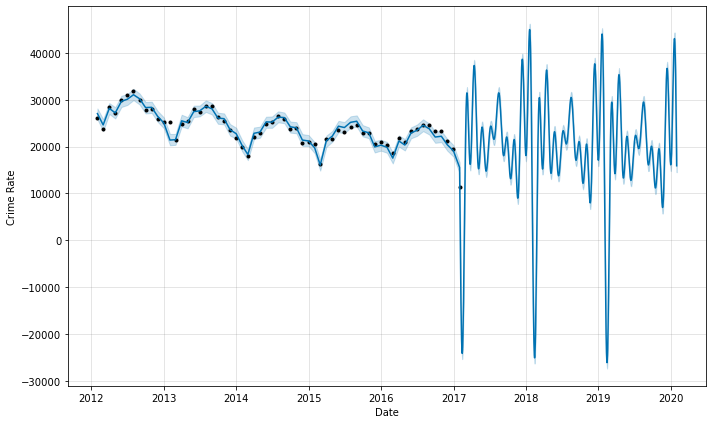

In [100]:
plt.figure(figsize=(50,10))
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

In [102]:
chicago_df57 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'


In [103]:
chicago_df57.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [104]:
chicago_df57.Date = pd.to_datetime(chicago_df57.Date, format='%m/%d/%Y %I:%M:%S %p')
chicago_df57.index = pd.DatetimeIndex(chicago_df57.Date)

Text(0, 0.5, 'Number of Crimes')

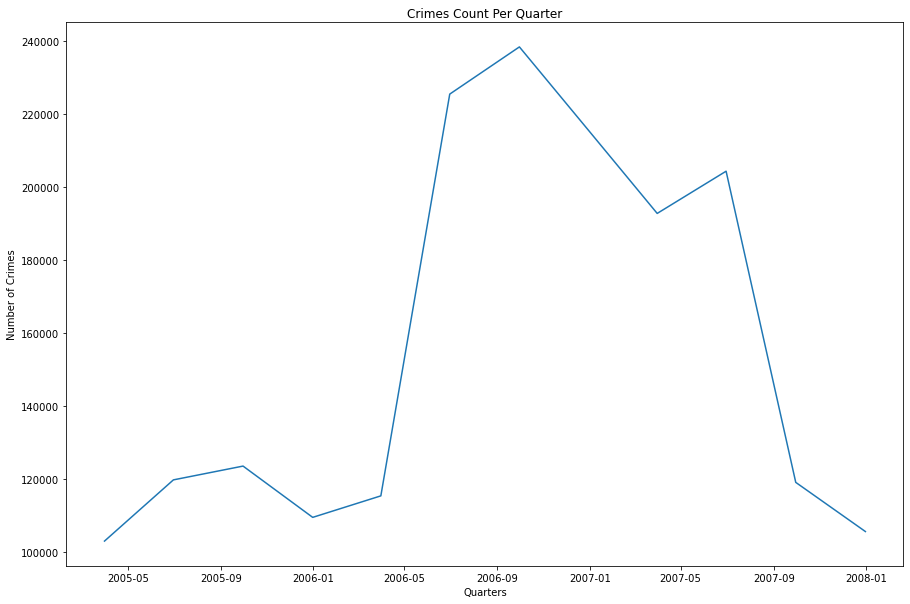

In [105]:
plt.figure(figsize=(15,10))
plt.plot(chicago_df57.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [116]:
chicago_prophet = chicago_df57.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [117]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [108]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [118]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [119]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [120]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [121]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,45725.286913,14302.504367,51830.084739,45725.286913,45725.286913,-12553.225772,-12553.225772,-12553.225772,-12553.225772,-12553.225772,-12553.225772,0.0,0.0,0.0,33172.061141
1,2005-02-28,46260.786296,18417.272163,55498.602785,46260.786296,46260.786296,-8852.945466,-8852.945466,-8852.945466,-8852.945466,-8852.945466,-8852.945466,0.0,0.0,0.0,37407.840830
2,2005-03-31,46853.660614,24661.298997,62875.074712,46853.660614,46853.660614,-3216.610742,-3216.610742,-3216.610742,-3216.610742,-3216.610742,-3216.610742,0.0,0.0,0.0,43637.049872
3,2005-04-30,47427.409955,34293.980119,73064.003296,47427.409955,47427.409955,5878.267060,5878.267060,5878.267060,5878.267060,5878.267060,5878.267060,0.0,0.0,0.0,53305.677015
4,2005-05-31,48020.284275,35524.447258,72276.860266,48020.284275,48020.284275,5674.493079,5674.493079,5674.493079,5674.493079,5674.493079,5674.493079,0.0,0.0,0.0,53694.777354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2008-12-26,72958.591827,-36896.282965,1466.095216,72957.765653,72959.373593,-91065.754032,-91065.754032,-91065.754032,-91065.754032,-91065.754032,-91065.754032,0.0,0.0,0.0,-18107.162205
397,2008-12-27,72977.697744,-22800.645502,14456.031260,72976.868461,72978.483479,-76996.807775,-76996.807775,-76996.807775,-76996.807775,-76996.807775,-76996.807775,0.0,0.0,0.0,-4019.110031
398,2008-12-28,72996.803660,-7767.494853,30130.695288,72995.971293,72997.593069,-61131.456174,-61131.456174,-61131.456174,-61131.456174,-61131.456174,-61131.456174,0.0,0.0,0.0,11865.347486
399,2008-12-29,73015.909577,10060.466571,47797.768639,73015.074254,73016.701492,-43657.021315,-43657.021315,-43657.021315,-43657.021315,-43657.021315,-43657.021315,0.0,0.0,0.0,29358.888262


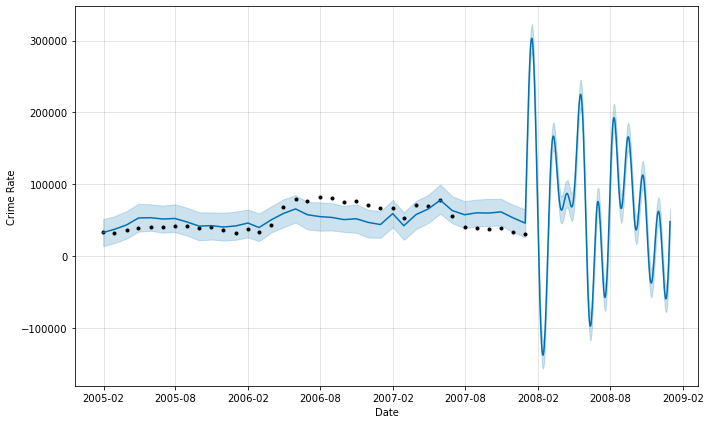

In [122]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

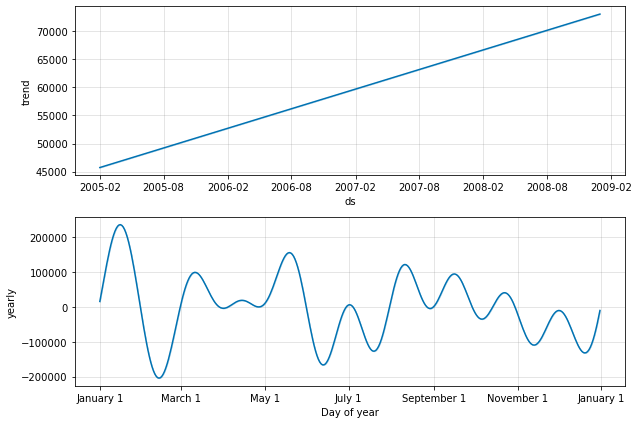

In [123]:
figure2 = m.plot_components(forecast)


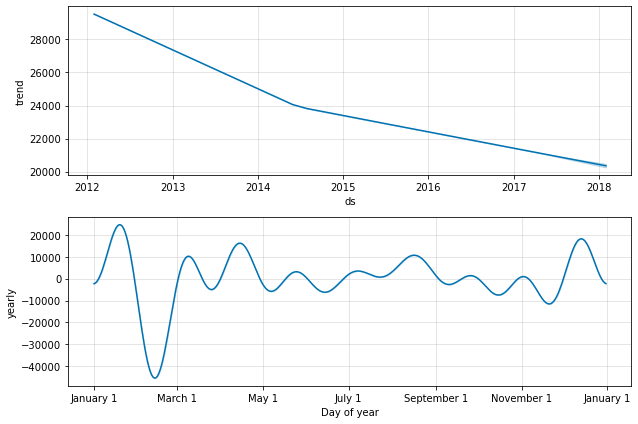

In [126]:
figure1220